/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


			*** OpenMP on Bluegene ***
nCores \ size		315		945		1575		1890		2835
1		0.0601335000	2.1804500000	6.3157000000	13.7790000000	50.9120000000	
2		0.0154200000	0.8442950000	3.4038500000	3.0419500000	14.8569000000	
4		0.0280975000	0.5672750000	2.6964000000	2.5088000000	12.6285000000	
7		0.0544505000	0.7240350000	2.2972500000	3.5128500000	10.2034500000	
11		0.0830610000	0.7585100000	2.3668500000	3.2303000000	7.7126500000	


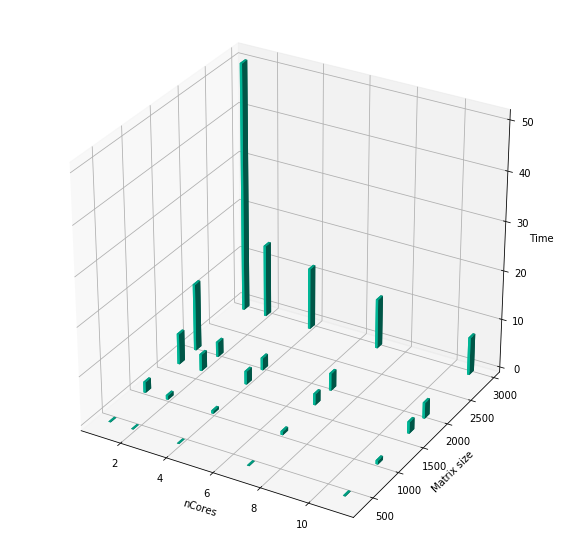

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os

def do(title, xlabel, nCoresList, sizesList):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    ax = fig.add_subplot(111, projection='3d')
    xPos = []
    ax.set_ylabel('Matrix size')

    yPos = []
    ax.set_xlabel(xlabel)
    zPos = []
    ax.set_zlabel('Time')
    dz = []
    sheet = []

    tab = "\t"

    a = np.array ([
        [0.06604,	1.5754,	6.6415,	14.452,	48.667],
        [0.016296,	0.53289,	2.0838,	3.8059,	9.5718],
        [0.031746,	0.4773,	3.3034,	2.4844,	12.952],
        [0.056864,	0.78498,	2.8875,	3.5159,	9.9319],
        [0.078872,	0.91051,	2.5375,	3.1444,	6.778]
    ])

    b = np.array([
        [0.054227,	2.7855,	5.9899,	13.106,	53.157],
        [0.014544,	1.1557,	4.7239,	2.278,	20.142],
        [0.024449,	0.65725,	2.0894,	2.5332,	12.305],
        [0.052037,	0.66309,	1.707,	3.5098,	10.475],
        [0.08725,	0.60651,	2.1962,	3.3162,	8.6473]
    ])

    mid = (a + b) / 2
    
    i1 = 0
    j1 = 0
    for (i1, nCores) in enumerate(nCoresList):
      for (j1, sz) in enumerate(sizesList):
        xPos.append(sz)
        yPos.append(nCores)
        zPos.append(0)
        time = mid[i1][j1]
        dz.append(time)
        sheet.append(time)

    dx = [0.1 for i in dz]
    dy = [100 for i in dz]

    print("\t\t\t***", title, "***")
    print(xlabel + " \ size", *sizesList, sep="\t" + tab)

    it = iter(sheet)
    for i in nCoresList:
        print(i, end="\t" + tab)
        for j in sizesList:
            f = next(it)
            try:
                f = float(f)
                print("%.10f" % f, end=tab)
            except:
                print(f, end="            " + tab)
        print()
    ax.bar3d(yPos, xPos, zPos, dx, dy, dz, color='#00ceaa')
    plt.show()


nCoresList = [1, 2, 4, 7, 11]
sizesList = [315, 945, 1575, 1890, 2835]

# nCpusList = [1, 2, 4, 8, 16, 32, 64, 128, 256]
do("OpenMP on Bluegene", "nCores", nCoresList, sizesList)